In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

plt.style.use("seaborn-v0_8-whitegrid")

In [2]:
# Chargement du jeu de données
df = pd.read_csv("BMW sales data (2010-2024) (1).csv")

# Sélection des variables pertinentes
cols = ["Year", "Price_USD", "Engine_Size_L", "Mileage_KM", "Sales_Volume"]
df = df[cols].dropna()

# Nettoyage : suppression des valeurs incohérentes
df = df[(df["Price_USD"] > 0) & (df["Engine_Size_L"] > 0) & (df["Mileage_KM"] > 0)]

# Agrégation annuelle (moyenne par année)
df = df.groupby("Year").mean().reset_index()

# Création de l'indice de modernité
df["Modernity_Index"] = (
    (df["Price_USD"] / df["Price_USD"].max())
    + (1 - df["Engine_Size_L"] / df["Engine_Size_L"].max())
    + (1 - df["Mileage_KM"] / df["Mileage_KM"].max())
)

df.head()

,Year,Price_USD,Engine_Size_L,Mileage_KM,Sales_Volume,Modernity_Index
0,2010,75072.215916,3.258318,99102.597297,5085.118619,1.023565
1,2011,75293.276388,3.263636,98849.272727,5112.550641,1.027370
2,2012,75019.567227,3.239256,100403.027311,5027.579532,1.015851
3,2013,74535.908298,3.252075,99859.341251,5071.176488,1.010905
4,2014,74556.535224,3.226985,100706.354328,5062.376119,1.010468


In [3]:
# Sélection des colonnes numériques
X = df.select_dtypes(include=[np.number])

# Standardisation (centrage-réduction)
scaler = StandardScaler()
Z = scaler.fit_transform(X)

# Réalisation de l’ACP
pca = PCA()
scores = pca.fit_transform(Z)

# Extraction des valeurs propres et de la variance expliquée
eigvals = pca.explained_variance_
ratio = pca.explained_variance_ratio_
cum = ratio.cumsum()

print("Valeurs propres :", np.round(eigvals, 3))
print("Variance expliquée cumulée :", np.round(cum[-1] * 100, 2), "%")


Valeurs propres : [2.564 1.554 1.137 1.052 0.122 0.   ]
Variance expliquée cumulée : 100.0 %


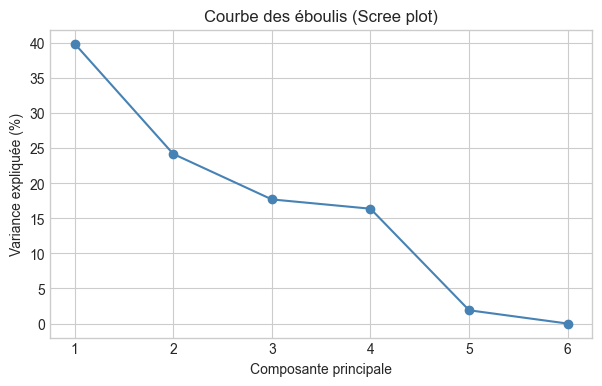

In [4]:
# Visualisation de la courbe des éboulis
plt.figure(figsize=(7, 4))
plt.plot(range(1, len(ratio)+1), ratio*100, marker='o', color='steelblue')
plt.xlabel("Composante principale")
plt.ylabel("Variance expliquée (%)")
plt.title("Courbe des éboulis (Scree plot)")
plt.show()


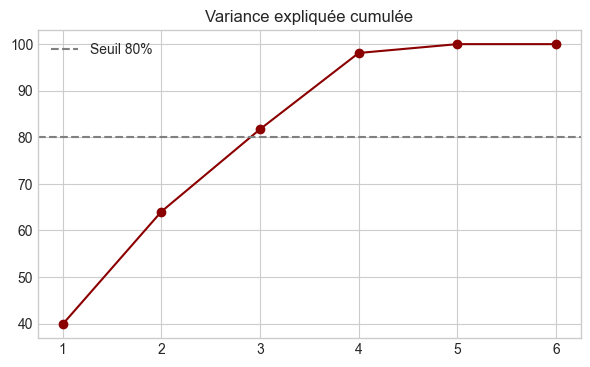

In [5]:
# Visualisation de la variance expliquée cumulée
plt.figure(figsize=(7, 4))
plt.plot(range(1, len(cum)+1), cum*100, marker='o', color='darkred')
plt.axhline(80, linestyle='--', color='gray', label="Seuil 80%")
plt.title("Variance expliquée cumulée")
plt.legend()
plt.show()

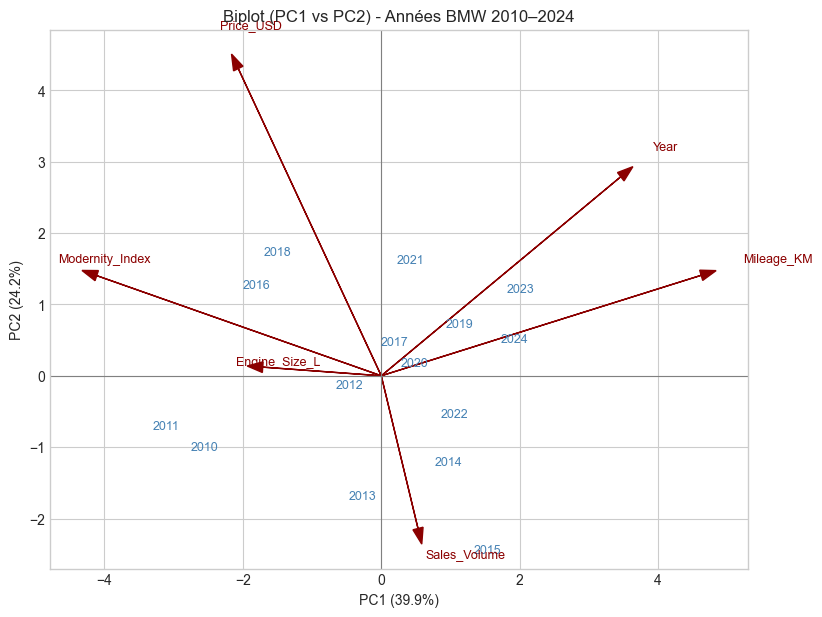

In [6]:
# Calcul des loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Visualisation du biplot
def biplot(scores2d, loads2d, names, ratio, years):
    plt.figure(figsize=(9,7))

    # Affichage des années
    for i, year in enumerate(years):
        plt.text(scores2d[i,0], scores2d[i,1], str(int(year)),
                 fontsize=9, color='steelblue', ha='center', va='center')

    # Ajout des flèches des variables
    scale = 5.0
    for i, name in enumerate(names):
        x, y = loads2d[i,0]*scale, loads2d[i,1]*scale
        plt.arrow(0,0,x,y,head_width=0.15,length_includes_head=True,color='darkred')
        plt.text(x*1.08, y*1.08, name, fontsize=9, color='darkred')

    # Axes et labels
    plt.axhline(0, color='gray', lw=0.8)
    plt.axvline(0, color='gray', lw=0.8)
    plt.xlabel(f"PC1 ({ratio[0]*100:.1f}%)")
    plt.ylabel(f"PC2 ({ratio[1]*100:.1f}%)")
    plt.title("Biplot (PC1 vs PC2) - Années BMW 2010–2024")
    plt.show()

# Affichage du biplot
biplot(scores[:, :2], loadings[:, :2], X.columns.tolist(), ratio, df["Year"])


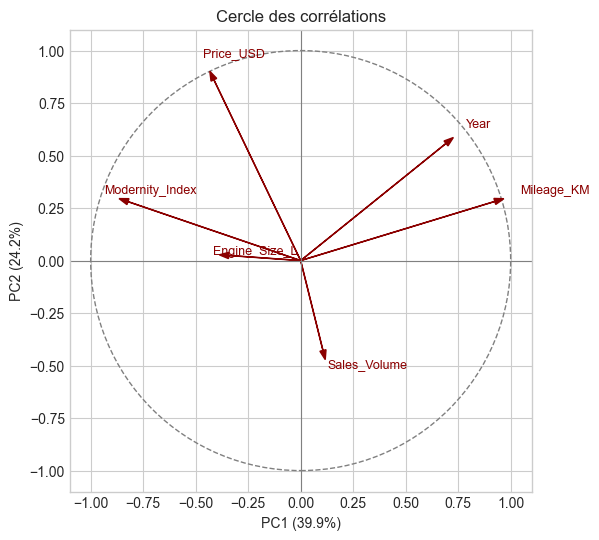

In [7]:
# Calcul des loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Visualisation du cercle des corrélations
def correlation_circle(loads2d, names, ratio):
    plt.figure(figsize=(6,6))
    ax = plt.gca()
    circle = plt.Circle((0,0), 1, fill=False, color='gray', linestyle='--')
    ax.add_artist(circle)

    # Ajout des flèches des variables
    for i, name in enumerate(names):
        x, y = loads2d[i,0], loads2d[i,1]
        plt.arrow(0, 0, x, y, head_width=0.03, length_includes_head=True, color='darkred')
        plt.text(x*1.08, y*1.08, name, fontsize=9, color='darkred')

    # Axes et labels
    plt.axhline(0, color='gray', lw=0.8)
    plt.axvline(0, color='gray', lw=0.8)
    plt.xlim(-1.1, 1.1); plt.ylim(-1.1, 1.1)
    plt.gca().set_aspect("equal", "box")
    plt.xlabel(f"PC1 ({ratio[0]*100:.1f}%)")
    plt.ylabel(f"PC2 ({ratio[1]*100:.1f}%)")
    plt.title("Cercle des corrélations")
    plt.show()

# Affichage du cercle des corrélations
correlation_circle(loadings[:, :2], X.columns.tolist(), ratio)
